<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/Tensorflow_with_CM_plot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
print(tf.__version__)

2.2.0-rc3


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [0]:
mnist = keras.datasets.fashion_mnist

In [0]:
type(mnist)

module

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
np.max(x_train)

255

In [0]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names =['top', 'trouser','pullover', 'dress', 'coat', 'sandal', 'shirt','sneaker','bag','ankle']

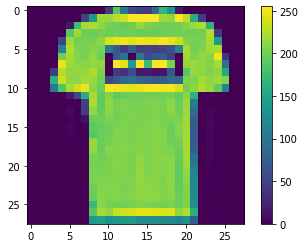

In [0]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

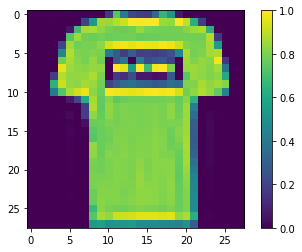

In [0]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

**Build the Model with TF 2.0**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
784*128+128

100480

**Model Compaliation**
* Loss Function
* Optimizer
* Metrics

In [0]:
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.1987 - accuracy: 0.9257 - val_loss: 0.2018 - val_accuracy: 0.9232
Epoch 2/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.1877 - accuracy: 0.9301 - val_loss: 0.2110 - val_accuracy: 0.9229
Epoch 3/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.1855 - accuracy: 0.9302 - val_loss: 0.2042 - val_accuracy: 0.9247
Epoch 4/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.1795 - accuracy: 0.9333 - val_loss: 0.2073 - val_accuracy: 0.9248
Epoch 5/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.1764 - accuracy: 0.9327 - val_loss: 0.2238 - val_accuracy: 0.9174
Epoch 6/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.1710 - accuracy: 0.9355 - val_loss: 0.2264 - val_accuracy: 0.9197
Epoch 7/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.1673 - accuracy: 0.9381 - val_loss: 0.2265 - val_ac

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.8818
0.8817999958992004


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = model.predict_classes(x_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8818

In [0]:
pred = model.predict(x_test)

In [0]:
pred

array([[2.0428308e-16, 1.1879967e-15, 7.6034681e-20, ..., 1.0962047e-05,
        1.0191599e-15, 9.9998903e-01],
       [2.8224938e-06, 1.0345932e-27, 9.9999475e-01, ..., 0.0000000e+00,
        2.3998289e-26, 4.2851339e-25],
       [2.2385148e-08, 1.0000000e+00, 2.8448828e-13, ..., 0.0000000e+00,
        4.9880262e-23, 0.0000000e+00],
       ...,
       [1.9329278e-13, 1.1402686e-30, 4.9410660e-13, ..., 1.5596952e-19,
        1.0000000e+00, 1.5849964e-24],
       [2.7212003e-13, 1.0000000e+00, 2.1707342e-17, ..., 3.0184459e-34,
        7.8015560e-19, 5.9147604e-22],
       [3.1053537e-06, 3.2987531e-16, 7.7227668e-08, ..., 1.7425920e-06,
        1.5546905e-07, 6.9225535e-11]], dtype=float32)

In [0]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
pred[0]

array([2.0428308e-16, 1.1879967e-15, 7.6034681e-20, 4.2821833e-18,
       4.4597259e-15, 9.6876214e-09, 9.6268217e-16, 1.0962047e-05,
       1.0191599e-15, 9.9998903e-01], dtype=float32)

In [0]:
np.argmax(pred[0])

9

In [0]:
np.argmax(pred[1])

2

**Ploting Learning Curve with TF 2.0**

In [0]:
#pip install mlxtend

In [0]:
help(model)

In [0]:
history.history

{'accuracy': [0.9256874918937683,
  0.9300833344459534,
  0.9302499890327454,
  0.9332708120346069,
  0.9326666593551636,
  0.9355000257492065,
  0.9381458163261414,
  0.9392291903495789,
  0.9394791722297668,
  0.9395416378974915],
 'loss': [0.1986725926399231,
  0.1877094805240631,
  0.18548880517482758,
  0.17948180437088013,
  0.17640896141529083,
  0.17096669971942902,
  0.1673300862312317,
  0.16285362839698792,
  0.1602197289466858,
  0.15843310952186584],
 'val_accuracy': [0.9231666922569275,
  0.9229166507720947,
  0.9246666431427002,
  0.924833357334137,
  0.9174166917800903,
  0.9197499752044678,
  0.9199166893959045,
  0.9200833439826965,
  0.9114166498184204,
  0.9131666421890259],
 'val_loss': [0.20184513926506042,
  0.2110031396150589,
  0.20420663058757782,
  0.2072940468788147,
  0.2237725853919983,
  0.22636161744594574,
  0.22645339369773865,
  0.23378761112689972,
  0.2527979910373688,
  0.25867384672164917]}

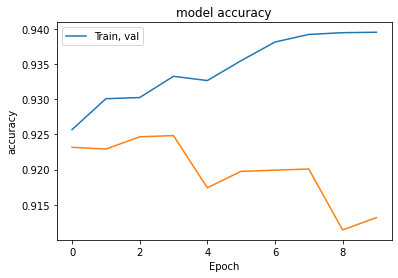

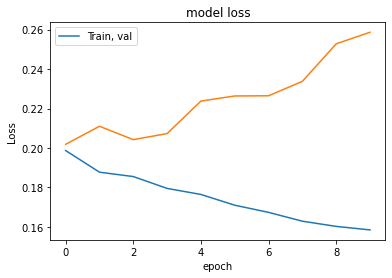

In [0]:
#plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train, val'], loc = 'upper left')
plt.show()

#plot taining loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train, val'], loc = 'upper left')
plt.show()

**Plot Confusing Matrix**

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
mat = confusion_matrix(y_pred, y_test)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9187533c8>)

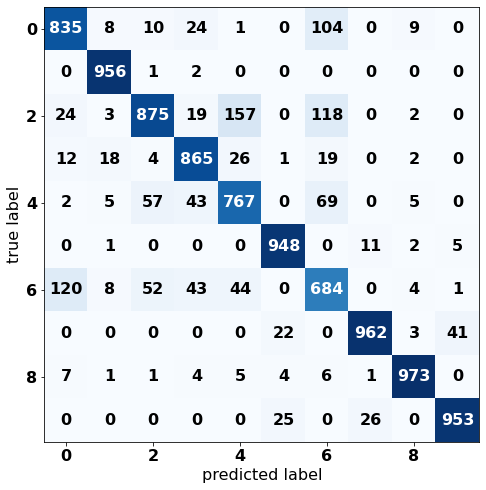

In [0]:
#font = {'family' : "Times New Romain",
 #       'weight' : 'bold',
  #      'size': 14}

#matplotlib.rc('font', **font)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8), show_normed=False)